In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob

In [3]:
raw_paths1 = glob.glob('/Users/patricknaylor/Desktop/Field_Detection/Images/Masked/*.npy')
raw_paths2 = glob.glob('/Users/patricknaylor/Desktop/Field_Detection/Images/Masked/*.jpg')
print(len(raw_paths1))
print(len(raw_paths2))

500
500


In [5]:
print(arr.shape)

(1330, 770)


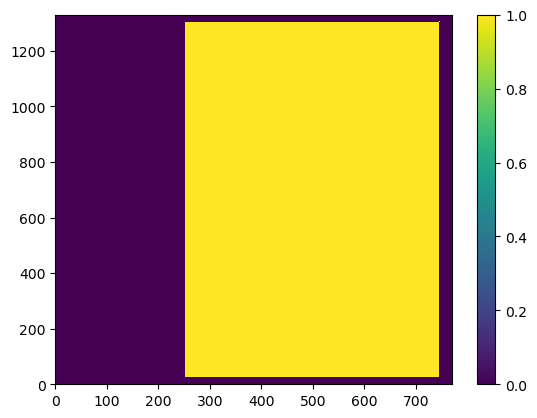

In [6]:
plt.pcolormesh(arr)
plt.colorbar()